# Understanding the Problem Statement

In this project, you will have to put yourself in the shoes of an HR analytics expert and by leveraging the data provided, you are supposed to identify "how salary is varying with respect to other considerable factors".

The dataset should be divided into test and train and you would have to use the training data to build the model and thereby apply it to test data to measure the performance and robustness of the model.

# Feature Description

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# loading the dataset and storing it into df

df = pd.read_csv('New_data_Set.csv')
df.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


In [3]:
df.shape # shape of the dataset

(5000, 20)

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

from the above information we can see that there are 20 columns which includes (float64(8), int64(4), object(8))

In [5]:
df.describe() #brief description about the dataset,like:mean,min_value,max_value,......

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Months
count,5000.000000,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,5000.00000
mean,0.160000,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,32.18480
std,0.366643,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,24.63673
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,0.00000
25%,0.000000,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,8.00000
50%,0.000000,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,28.00000
75%,0.000000,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,55.00000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.903904,313.688694,312.432438,118.75000,72.00000


In [6]:
# from the df.info it shows that 'Total_Sales' is object datatype we have convert it into required datatype.

df['Total_Sales'] = pd.to_numeric(df['Total_Sales'],errors='coerce')

In [7]:
df['Total_Sales'].dtype #checking for datatype after converting.

dtype('float64')

In [8]:
df.isnull().sum() # checking for the null values 
                       #df.isnull().sum()/len(df)*100 this code is for checking the % of null values

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales         16
Months               0
Education            0
dtype: int64

In [9]:
# here we can the numerical features of dataset.

num_features=[feature for feature in df.columns if df[feature].dtypes!='object']
num_features

['Business',
 'Age',
 'Salary',
 'Base_pay',
 'Bonus',
 'Unit_Price',
 'Volume',
 'openingbalance',
 'closingbalance',
 'low',
 'Unit_Sales',
 'Total_Sales',
 'Months']

In [10]:
# here we can see the categorical features of the dataset.

cat_features=[feature for feature in df.columns if df[feature].dtypes=='object']
cat_features

['Gender', 'Dependancies', 'Calls', 'Type', 'Billing', 'Rating', 'Education']

In [11]:
# checking the skewness of the numerical columns of the dataset.
#it shows that whether the feature is normally distributed or not.

df.skew(skipna = True,axis=0) 

Business          1.855409
Age              -0.259971
Salary           -0.396042
Base_pay         -0.364195
Bonus            -0.396042
Unit_Price        5.989663
Volume            8.709735
openingbalance    3.312744
closingbalance    3.226368
low               3.233667
Unit_Sales       -0.225447
Total_Sales       0.971878
Months            0.257274
dtype: float64

A skewness value of 0.000 in the output denotes a symmetrical distribution of values in row.

A negative skewness value in the output(ex:-0.259971) indicates an asymmetry in the distribution and the tail is larger towards the left hand side of the distribution.

A positive skewness value in the output(ex:5.989663) indicates an asymmetry in the distribution and the tail is larger towards the right hand side of the distribution.

From the output it is clear that any of the column is not normally distributed.

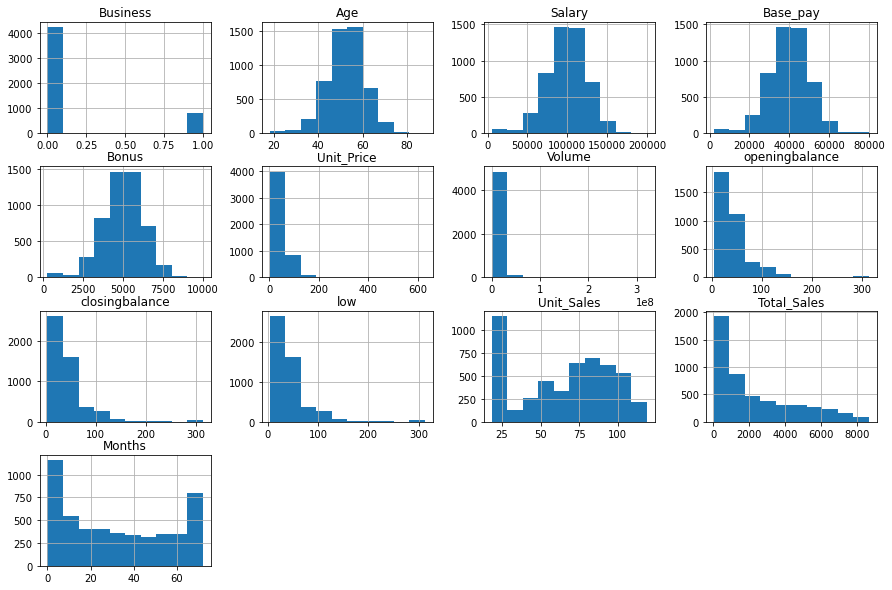

In [12]:
#visualize above information by plotting the histogram plot,to check the normal distribution.

df.hist(figsize=(15,10))
plt.show()

In [13]:
#checking the correlation using spearman rank correlation.

df.corr(method='spearman')

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
Business,1.000000,-0.008435,-0.018403,-0.019292,-0.018403,-0.019480,-0.002192,0.001083,-0.007485,-0.018103,-0.018363,-0.019663,-0.012282
Age,-0.008435,1.000000,0.202282,0.193690,0.202282,0.128266,-0.039345,0.068410,0.440989,0.202040,0.202268,0.196744,0.222837
Salary,-0.018403,0.202282,1.000000,0.999976,1.000000,0.811713,-0.390488,0.297932,0.346498,0.999859,0.999997,1.000000,0.603796
Base_pay,-0.019292,0.193690,0.999976,1.000000,0.999976,0.811679,-0.390787,0.291481,0.339959,0.999832,0.999973,0.999975,0.599535
Bonus,-0.018403,0.202282,1.000000,0.999976,1.000000,0.811713,-0.390488,0.297932,0.346498,0.999859,0.999997,1.000000,0.603796
Unit_Price,-0.019480,0.128266,0.811713,0.811679,0.811713,1.000000,-0.324230,0.172338,0.263699,0.812412,0.811735,0.810661,0.550062
Volume,-0.002192,-0.039345,-0.390488,-0.390787,-0.390488,-0.324230,1.000000,-0.024988,-0.147108,-0.392209,-0.390505,-0.391428,-0.262077
openingbalance,0.001083,0.068410,0.297932,0.291481,0.297932,0.172338,-0.024988,1.000000,0.288672,0.297840,0.297938,0.297331,-0.003899
closingbalance,-0.007485,0.440989,0.346498,0.339959,0.346498,0.263699,-0.147108,0.288672,1.000000,0.346278,0.346485,0.342083,0.365927
low,-0.018103,0.202040,0.999859,0.999832,0.999859,0.812412,-0.392209,0.297840,0.346278,1.000000,0.999856,0.999858,0.603752


Spearman’s returns a value from -1 to 1, where: +1 = a perfect positive correlation between ranks -1 = a perfect negative correlation between ranks 0 = no correlation between ranks.

# visualization

Checking the relationship of categorical features. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Male      2528
Female    2472
Name: Gender, dtype: int64

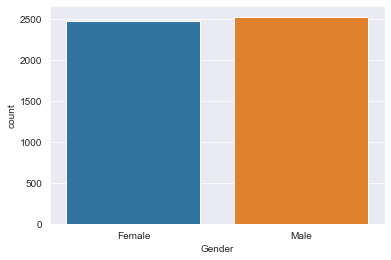

In [14]:
sns.set_style("darkgrid")
sns.countplot(df['Gender'])
df['Gender'].value_counts()

In [15]:
#checking which gender has most average salary.
#by using groupby(),mean() indicates the avg 

gender= df.groupby('Gender')['Salary'].mean()
gender

Gender
Female     99261.893521
Male      100369.557745
Name: Salary, dtype: float64

from the output:male has highest avg salary compare to female

<AxesSubplot:title={'center':'Avg salary for Male and Female'}, xlabel='Gender'>

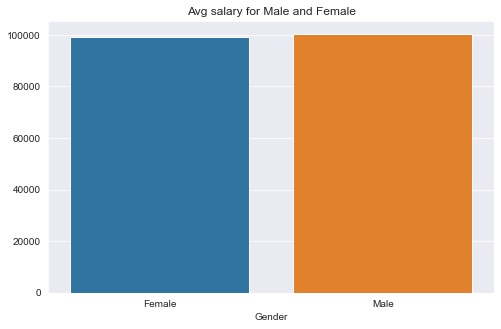

In [16]:
#visualizing the above output

plt.figure(figsize=(8,5))
plt.title('Avg salary for Male and Female')
sns.barplot(x=df.groupby('Gender')['Salary'].mean().keys(),
             y=df.groupby('Gender')['Salary'].mean().values)

In [17]:
df['Age'].unique() # checking the unique values in 'Age' column

#we can see that starting num of age is 18

array([18, 19, 22, 21, 23, 24, 43, 44, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 45, 39, 40, 41, 42, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       73, 74, 75, 76, 20, 26, 25, 78, 88, 72, 80, 82, 85, 79],
      dtype=int64)

In [18]:
# dividing the age into different age-groups.

age = pd.cut(df['Age'], bins=[18,25,35,45,55,65,100],
             labels=['18-25','25-35','35-45','45-55','55-65','65 and above'])
age.value_counts()

## the age group 45-55 has the highest count 

45-55           2284
55-65           1422
35-45            895
65 and above     248
25-35            112
18-25             37
Name: Age, dtype: int64

In [19]:
#pd.crosstab(age, df['Gender'])
df.groupby(age)['Salary'].mean().sort_values(ascending=False)

Age
65 and above    113245.216754
55-65           106625.480984
45-55            98951.698324
35-45            90865.898085
25-35            80672.848520
18-25            79727.459600
Name: Salary, dtype: float64

65 and above age group has the highest avg salary

<AxesSubplot:title={'center':'Avg salary for different age groups'}, xlabel='Age'>

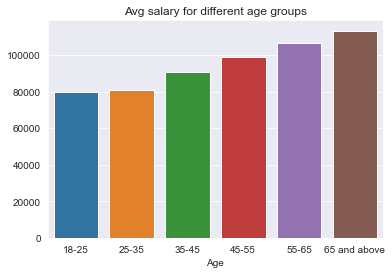

In [20]:
#ploting the above output

plt.title('Avg salary for different age groups')
sns.barplot(x=df.groupby(age)['Salary'].mean().sort_values(ascending=False).keys(),
             y=df.groupby(age)['Salary'].mean().sort_values(ascending=False).values)

In [21]:
#checking for most dependent on a person

pd.crosstab(df['Gender'],df['Dependancies'])

#male has the most dependent on a person

Dependancies,No,Yes
Gender,,
Female,1756,716
Male,1768,760


Education
PG                     106455.698134
Graduation              91731.465271
Intermediate             8797.040201
High School or less      8021.192905
Name: Salary, dtype: float64


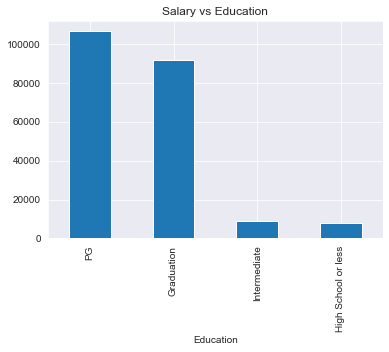

In [22]:
#cheking for the relationship between 'Salary & Education'

df_edu = df.groupby('Education')['Salary'].mean().sort_values(ascending=False)
print(df_edu)
df_edu.plot(kind='bar')
plt.title('Salary vs Education');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


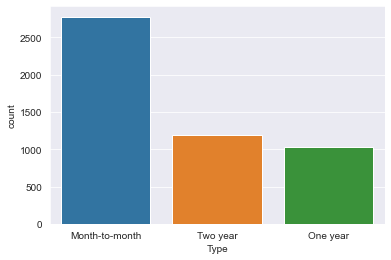

Month-to-month    2777
Two year          1195
One year          1028
Name: Type, dtype: int64

In [23]:
#checking for which type of payment had most count

sns.countplot(df['Type'])
plt.show()
df['Type'].value_counts()

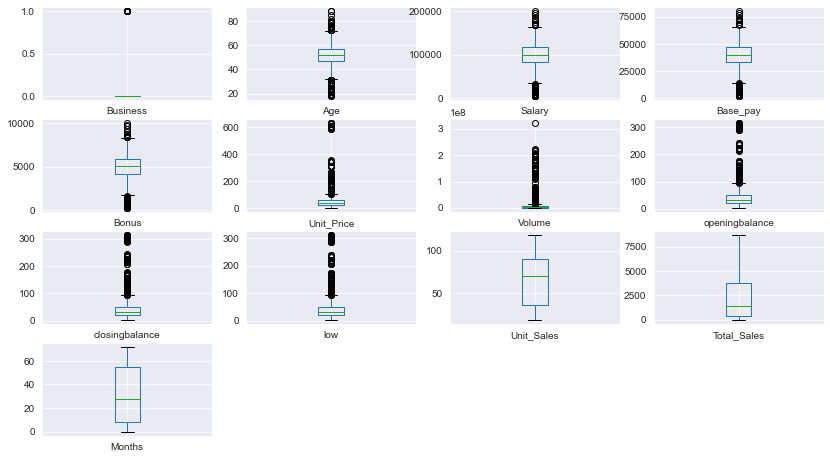

In [24]:
# plotting the boxplot to check the outliers

df.plot(kind='box',figsize=(14,12),layout=(6,4),sharex=False,subplots=True);

From the above plot: except unit_sales,total_sales,and months all the other has outliers

In [25]:
df.isnull().sum().sum()/len(df)*100 #percentage of null values

30.3

In [26]:
df1 = df.copy() #copying it into the df1

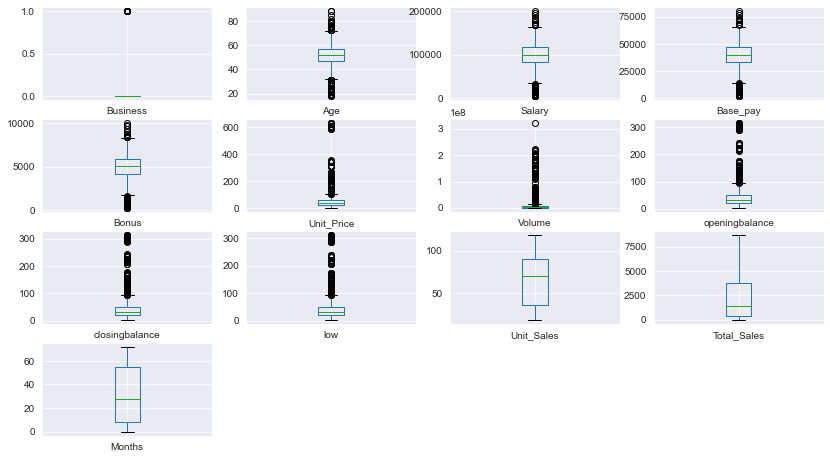

In [27]:
df1.plot(kind='box',figsize=(14,12),layout=(6,4),sharex=False,subplots=True);

In [28]:
#the numerical columns which has outliers storing it into the df1_num.

df1_num =['Age', 'Salary','Base_pay','Bonus','Unit_Price','Volume','openingbalance',
          'closingbalance','low','Unit_Sales','Total_Sales','Months']

In [29]:
#for capping the outliers.

def df_iqr(df,cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        whisker_width = 1.5
        upper_whisker = Q3 +(whisker_width*IQR)
        lower_whisker = Q1 -(whisker_width*IQR) 
        df[col]=np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

In [30]:
df_iqr(df1,df1_num)

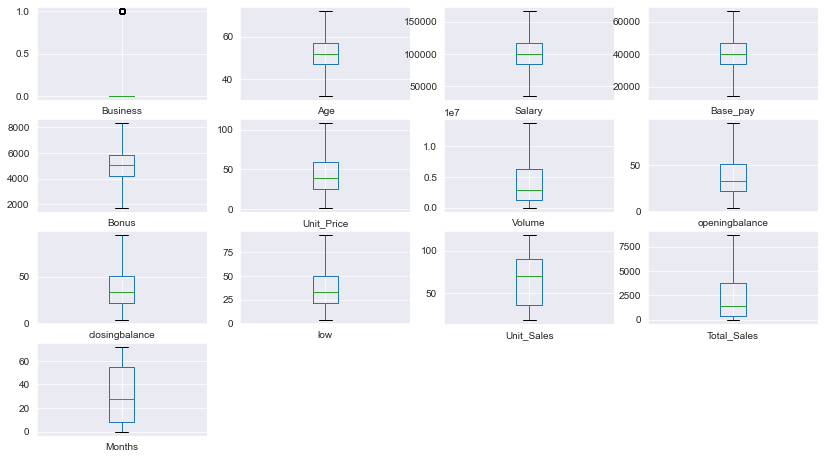

In [31]:
# checking for the outliers after the capping.

df1.plot(kind='box',figsize=(14,12),layout=(6,4),sharex=False,subplots=True);

In [32]:
## filling the missing values with median

df1['Base_pay'].fillna(value=df1['Base_pay'].median(),inplace = True)
df1['openingbalance'].fillna(value=df1['openingbalance'].median(),inplace = True)

df1['Total_Sales'].fillna(value=df1['Total_Sales'].median(),inplace = True)

In [33]:
##checking the value_counts of all the columns

#for c in df.columns:
 #print ("---- %s ---" % c)
  #print (df1[c].value_counts())

In [34]:
#cat_features

MAPPING THE CATEGORICAL FEATURES INTO NUMERICAL

SO THAT IT IS EASY TO UNDERSTAND FOR THE MACHINE,IT HELPS TO BUILD THE MACHINE LARNING MODEL AND EASY TO PREDICT THE VALUES

In [35]:
#gender
df1['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1}).astype(int)

In [36]:
#Dependancies
df1['Dependancies'] = df1['Dependancies'].map({'No': 0, 'Yes': 1}).astype(int)

In [37]:
#Calls
df1['Calls'] = df1['Calls'].map({'No': 0, 'Yes': 1}).astype(int)

In [38]:
#Type
df1['Type'] = df1['Type'].map({'Month-to-month': 2, 'Two year': 1,'One year': 0}).astype(int)

In [39]:
#Billing
df1['Billing'] = df1['Billing'].map({'No': 0, 'Yes': 1}).astype(int)

In [40]:
#Rating
df1['Rating'] = df1['Rating'].map({'No': 0, 'Yes': 1}).astype(int)

In [41]:
#Education
df1['Education'] = df1['Education'].map({'High School or less': 0, 'Intermediate': 1,'Graduation': 2,
                                         'PG':3}).astype(int)

In [42]:
df1.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,1,0,0,1,2,0,1,32.0,34357.708738,14113.032435,1717.885438,3.77,13691975.0,3.75,3.76,3.65,18.25,18.80,0.0,0
1,1,0,0,1,2,0,1,32.0,34357.708738,14113.032435,1717.885438,3.74,10462800.0,3.85,3.68,3.65,18.40,18.85,0.0,0
2,0,0,0,1,2,1,0,32.0,34357.708738,14113.032435,1717.885438,3.89,13691975.0,4.23,4.29,3.72,18.70,18.90,0.0,0
3,1,1,0,1,2,1,1,32.0,34357.708738,14113.032435,1717.885438,4.35,13691975.0,4.26,4.31,3.83,18.75,19.00,0.0,0
4,0,0,0,1,2,1,1,32.0,34357.708738,14113.032435,1717.885438,4.34,13691975.0,4.79,4.41,4.08,18.80,19.05,1.0,0


In [43]:
## Checking for the correlation using 'variance_inflation_factor'(VIF).

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [45]:
X = df1
calc_vif(X)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Gender,1.964130
1,Business,1.279965
2,Dependancies,1.526193
3,Calls,10.287785
4,Type,4.376043
5,Billing,2.597342
6,Rating,1.604810
7,Age,50.279246
8,Salary,inf
9,Base_pay,924.345125


# Train-Test Splitting

In [46]:
# droping the independent variables which is not related to the X
x = df1.drop(['Salary','Unit_Sales','low','Unit_Price','Bonus','Base_pay','Age'],axis = 1)
y = df1['Salary']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (3500, 13)
x_test: (1500, 13)
y_train: (3500,)
y_test: (1500,)


# Selecting and Evaluating the model

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
## checking the accuracy of the train and test data

y_pred = lr.predict(x_test)

#print("Acc on training data: {:,.3f}".format(lr.score(x_train, y_train)))
print("Acc on training data",lr.score(x_train, y_train))
print("Acc on test data: {:,.3f}".format(lr.score(x_test, y_test)))

Acc on training data 0.8433296493082775
Acc on test data: 0.825


In [50]:
from sklearn import metrics

LinReg = lr.score(x_test, y_test)
  
mae_lr = round(metrics.mean_absolute_error(y_test, y_pred), 4)
mse_lr = round(metrics.mean_squared_error(y_test, y_pred), 4)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [52]:
models = pd.DataFrame(
    {  'Model' : ['LinReg'],
       'Score' : [LinReg],
        'MAE'  : [mae_lr],
        'MSE'  : [mse_lr],
        'rmse' : [rmse_lr]
    })
  
models

,Model,Score,MAE,MSE,rmse
0,LinReg,0.824951,7457.2567,1.089279e+08,10436.852778
